# 项目 : 预测波士顿的房价

此项目根据波士顿房屋信息数据来训练和测试一个模型，并对模型的性能和预测能力进行评估，从而实现对房价的预测。

此项目的数据集来自[kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)原始数据，未经过任何处理。该数据集统计了2006年至2010年波士顿个人住宅销售情况，包含2900多条观测数据（其中一半是训练数据，即我们的`housedata.csv`文件）。更多文档信息可以参考[作者的文档](http://jse.amstat.org/v19n3/decock.pdf)，以及项目附件`data_description.txt`特征描述文件

In [1]:
# 载入此项目需要的库
import numpy as np
import pandas as pd
import visuals as vs # 补充的可视化代码
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # 使用seaborn风格

import warnings
warnings.filterwarnings('ignore')
# 显示所有列
#pd.set_option('display.max_columns', None)
 
# 显示所有行
#pd.set_option('display.max_rows', None)

%matplotlib inline
print('你已经成功载入所有库！')

你已经成功载入所有库！


### 加载数据

In [2]:
# 载入波士顿房屋的数据集：使用pandas载入csv，并赋值到data_df
data_df = pd.read_csv('housedata.csv')

print(data_df.shape)

(1460, 81)


## 数据分析
接下来我们需要对房屋信息数据进行观察分析，通过对数据的探索可以更好的理解数据。

首先我们得明确下数据的特征集合和要预测的目标属性，也就是我们要将数据划分为**特征(features)**和**目标变量也就是标签(labels)**
通过分析数据和阅读特征描述文件，我们做出判断如下:
- **标签**：` 'SalePrice'`，是我们希望预测的变量。
- **特征**：除` 'SalePrice'`外的属性都是特征，它们反应了数据点在某些方面的表现或性质。

### 观察数据

接下来我们进一步的来了解数据,我们循序渐进的一步一步的来理解这些数据

In [3]:
# 打印出前10条数据
data_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


**Id特征对我们训练数据没有任何用处，在`data_df`中使用`drop`方法删除`'Id'`列数据**

In [4]:
# 删除data_df中的Id特征（保持数据仍在data_df中，不更改变量名）
data_df.drop('Id',axis=1,inplace=True)
data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**使用`describe`方法观察`data_df`各个特征的统计信息：**

In [5]:
data_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 数据预处理
观察到数据集不可能是百分百的‘干净’数据（即有用数据），总会在采集整理时有些”失误“、“冗余”，造成“脏”数据，所以要从数据的正确性和完整性这两个方面来清理数据。

- **正确性**：一般是指有没有异常值，比如我们这个数据集中[作者的文档](http://jse.amstat.org/v19n3/decock.pdf)所说：
`I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.`
建议我们去掉数据中`'GrLivArea'`中超过4000平方英尺的房屋（具体原因可以参考文档），当然本数据集还有其他的异常点，这里不再处理。
- **完整性**：采集或者整理数据时所产生的空数据造成了数据的完整性缺失，通常我们会使用一定的方法处理不完整的数据。在本例中，我们使用以下两种方法，一是[丢弃数据](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456),即选择丢弃过多空数据的特征（或者直接丢弃数据行，前提是NA数据占比不多），二是填补数据，填补的方法也很多，均值中位数众数填充等等都是好方法。

**正确性**

删除一些不正确异常的数据

**使用`matplotlib`库中的[scatter方法](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) 绘制`'GrLivArea'`和`'SalePrice'`的散点图，x轴为`'GrLivArea'`，y轴为`'SalePrice'`，观察数据**

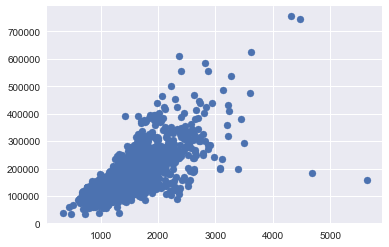

In [6]:
plt.scatter(data = data_df, x = 'GrLivArea', y = 'SalePrice')

**通过上图我们可以看到那几个异常值，即`'GrLivArea'`大于4000，但是`'SalePrice'`又极低的数据，从`data_df`删除这几个异常值，删除后重新绘制`'GrLivArea'`和`'SalePrice'`的关系图，确认异常值已删除。**

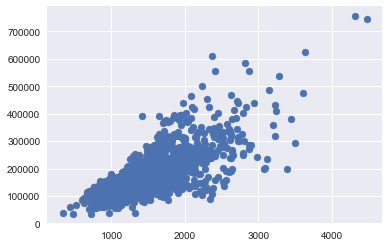

In [7]:
# 从data_df中删除 GrLivArea大于4000 且 SalePrice低于300000 的值
data_df.drop(data_df[(data_df.GrLivArea > 4000) & (data_df.SalePrice < 300000)].index, inplace = True)

# 重新绘制GrLivArea和SalePrice的关系图，确认异常值已删除
plt.scatter(data = data_df, x = 'GrLivArea', y = 'SalePrice')

**完整性**

将一些特征属性中的缺失值补全

**筛选出过多空数据的特征，我这里定为筛选出有超过25%为空数据的特征**

In [8]:
limit_percent = 0.25
limit_value = len(data_df) * limit_percent
result = data_df.isna().sum()
result[result.values>limit_value]

Alley          1367
FireplaceQu     690
PoolQC         1452
Fence          1177
MiscFeature    1404
dtype: int64

**根据`data_description.txt`特征描述,使用[fillna方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)填充空数据**

In [9]:
# 确定所有空特征
missing_columns = list(data_df.columns[data_df.isnull().sum() != 0])
# 确定哪些是类别特征，哪些是数值特征
missing_numerical = list(data_df[missing_columns].dtypes[data_df[missing_columns].dtypes != 'object'].index)
missing_category = [i for i in missing_columns if i not in missing_numerical]
print("数值特征缺失:",missing_numerical)
print("类别特征缺失:",missing_category)

数值特征缺失: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
类别特征缺失: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
# 需要填充众数的特征

fill_Mode = ['Electrical']
data_df[fill_Mode] = data_df[fill_Mode].fillna(data_df['Electrical'].mode().values[0])

# 需要填充None的特征
fill_None = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
data_df[fill_None] = data_df[fill_None].fillna("None")

# 需要填充0的特征
fill_0 = ['GarageYrBlt']
data_df[fill_0].fillna(0)

# 需要填充中位数的特征
fill_median = ['LotFrontage', 'MasVnrArea']
data_df[fill_median] = data_df[fill_median].fillna(data_df[fill_median].median().to_dict())

###  特征分析
有这么一句话在业界广泛流传：特征数据决定了机器学习的上限，而模型和算法只是逼近这个上限而已。特征工程，是整个数据分析过程中不可缺少的一个环节，其结果质量直接关系到模型效果和最终结论。从上面两步中我们得到了“干净”的数据，但是`data_df`总共有81个特征，我们应当剔除那些无关紧要的特征（噪声），使用真正关键的特征来进行模型训练。现在需要我们对这些庞大的数据进行分析，提取出与目标最为关联的数据。

如果特征极其多，很难清晰的看到特征与目标变量之间的关系，就需要利用统计知识来进行多变量分析了。我们常使用[热图heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)结合[corr方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)计算列与列之间的相关系数来进行分析，热图Heatmap可以用颜色变化来反映变量之间的相关性二维矩阵或说相关性表格中的数据信息，它可以直观地将数据值的大小以定义的颜色深浅表示出来。本项目中以相关性绝对值大于0.5为界来选取我们需要的特征。

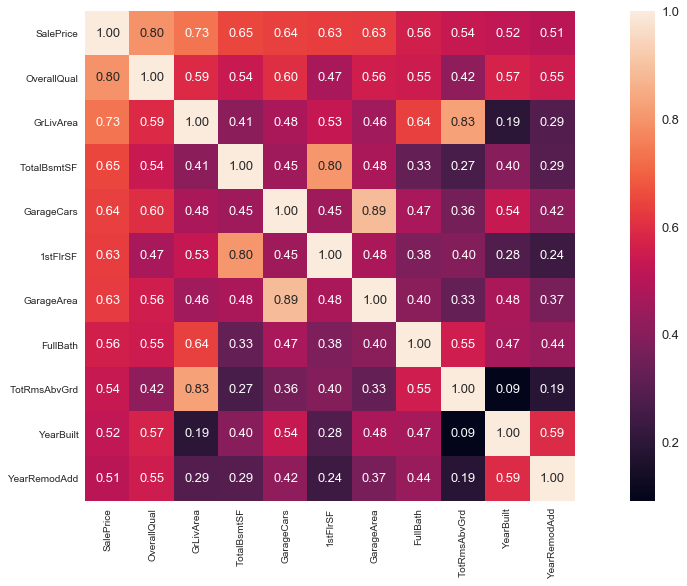

In [11]:
corrmat = data_df.corr().abs()
top_corr = corrmat[corrmat["SalePrice"]>0.5].sort_values(by = ["SalePrice"], ascending = False).index
cm = abs(np.corrcoef(data_df[top_corr].values.T))
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=top_corr.values, xticklabels=top_corr.values);
data_df = data_df[top_corr]

(array([148., 722., 372., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

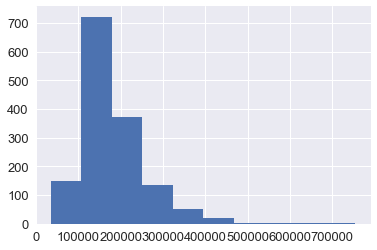

In [12]:
# 绘制SalePrice的直方图
plt.hist(data = data_df, x = 'SalePrice',bins = 10)

可以看出`ScalePrice`特征呈现正偏态分布，我们需要将它转换为正态分布

我们已经从庞大的特征群中筛选出了最相关的特征，也了解了我们目标数据的分布，那么接下来，我们从创造性方面来对我们的特征进行“改造”。
- **创造性**：创造性主要是说两种情况，一种是对现有数据的处理，比如对类别的独热编码（One-hotEncoder）或者标签编码（LabelEncoder），数值的区间缩放，归一化，标准化等等，另一种就是根据某一个或多个特征创造一个新的特征，例如某特征按组分类(groupby)后，或者某些特征组合后来创造新特征等等。

因为我们筛选出来的特征都为数值类型特征，所以我们只做标准化的操作：这个项目是一个回归类型的项目，而我们的回归算法对标准正态分步预测较为准确，从我们的目标数据可以看出数据是一个正偏态分布，那么我们使用log对数将数据从偏态分布转换为标准正态分布，最后进行标准化。

In [13]:
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler

data_df['SalePrice'] = np.log1p(data_df['SalePrice'])
numeric_features = list(data_df.columns)
numeric_features.remove('SalePrice')
for feature in numeric_features:
    data_df[feature] = boxcox1p(data_df[feature], 0.15)#偏态转正态,执行Box-Cox变换

scaler = StandardScaler()
scaler.fit(data_df[numeric_features])
data_df[numeric_features] = scaler.transform(data_df[numeric_features])

## 建立模型
接下来我们构建符合项目要求的模型

### 定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[决定系数](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

$R^2$ 的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的 $R^2$ 值为0还不如直接用**平均值**来预测效果好；而一个 $R^2$ 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。模型也可能出现负值的 $R^2$，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。

In [14]:
# : 引入 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)  
    return score

$R^2$ 分数是指可以从自变量中预测的因变量的方差比例。 换一种说法：

* $R^2$ 为0意味着因变量不能从自变量预测。
* $R^2$ 为1意味着可以从自变量预测因变量。
* $R^2$ 在0到1之间表示因变量可预测的程度。
* $R^2$ 为0.40意味着 Y 中40％的方差可以从 X 预测。

### 数据分割与重排
接下来，需要分割波士顿房屋数据集，包括特征与目标变量、训练集和测试集。通常在这个过程中，数据也会被重排，以消除数据集中由于顺序而产生的偏差。

**将`data_df`分割为特征和目标变量**

In [15]:
labels = data_df['SalePrice']# 提取SalePrice作为labels
features = data_df.drop('SalePrice',axis=1)# 提取除了SalePrice以外的特征赋值为features

In [16]:
from sklearn.model_selection import train_test_split
import random
random.seed(42)

# 打乱并分割训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

问题 1 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

* 将数据划分为训练集和测试集，训练集用来训练模型，测试集用来测试模型的性能。如果用模型已经见过的数据，例如部分训练集数据进行测试，那么无法准确衡量出模型准确性的好坏，测试模型的目的是为了审核模型性能的优劣，看训练出来的模型是否合理，用已经见过的数据，无法客观真实反映出模型预测的水平。训练模型要具有泛化能力，将数据拆分为训练集和测试集，也为了防止过拟合和欠拟合，模型最终是要对未知的数据进行预测，看其预测效果如何，用已知的数据或者没有测试集，是无法准确评估模型的表现，也无法知道模型对未知数据的预测能力。